## Homework:

1.Given the iris data set, use the last two features "penal length" and "penal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{penal length} = 7$, $\text{penal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot the linear boundaries, and compare it with the LDA's boundary.



In [41]:
%pylab inline
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
print type(iris.data)

iris.x = iris.data[:, [2, 3]]
iris.y = iris.target

logit = linear_model.LogisticRegression()
logit.fit(iris.x, iris.y)
## (1)
print "The accuracy of logistic regression is: " + str(logit.score(iris.x, iris.y))

## (2)
print "The prediction of the new obsevation is: " + str(logit.predict([7, 4]))
print "The probabilities of the new obsevation belongs to each class are: " + str(logit.predict_proba([7, 4]))

Populating the interactive namespace from numpy and matplotlib
<type 'numpy.ndarray'>
The accuracy of logistic regression is: 0.873333333333
The prediction of the new obsevation is: [2]
The probabilities of the new obsevation belongs to each class are: [[  1.62999770e-05   1.10275904e-01   8.89707796e-01]]


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


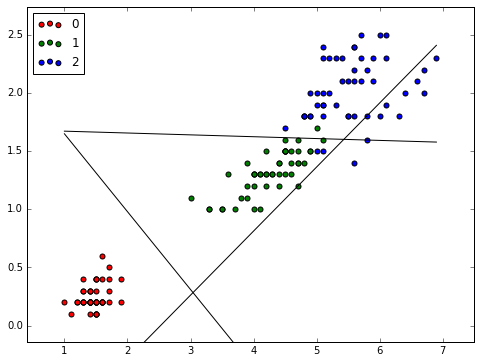

In [37]:
def logistic_model_2Dplot(x, model):
    
    def plot_y(x_1, model=model):
        ## np.column_stack() combines intercept with coefficents
        for coef in np.column_stack((model.intercept_, model.coef_)):
            ## take b0, b1, b2 for one boundary at a time 
            b_0, b_1, b_2 = coef[:3]
            ## given 1, calculate corresponding x2
            yield map(lambda x: -(b_0+b_1*x)/b_2, x_1)
    
    x = np.array(x)
    x_a = [min(x[:,0]), max(x[:,0])]
    for x_b in plot_y(x_a, model):
        plt.plot(x_a, x_b, c="k")
        
def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r","g","b","m","c","k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([min(x[:,0])-del_0, max(x[:,0])+del_0, \
              min(x[:,1])-del_1, max(x[:,1])+del_1])
    
data_2Dplot(iris.data[:,2:], iris.target)
logistic_model_2Dplot(iris.data[:,2:], logit)

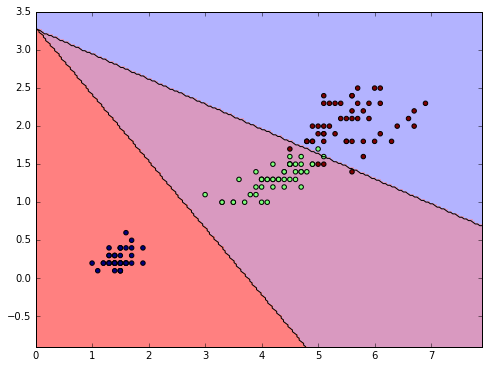

In [39]:
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris.data[:,2:], iris.target)

def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be np.arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as pl
    from matplotlib import colors
    colDict = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
               'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
               'blue': [(0, 1, 0.5), (1, 1, 1)]}
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    pl.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    pl.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    pl.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    pl.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    pl.scatter(x, y, c = label)
    pl.xlim(x_min, x_max)

    pl.ylim(y_min, y_max)

plt.rcParams['figure.figsize'] = 8,6
plotModel(LDA, iris.data[:,2], iris.data[:,3], iris.target)

2.There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.
    
The following codes may be a useful beginning:

In [29]:
import pandas as pd
import numpy as np
train = pd.read_csv('spam_train.csv')
test = pd.read_csv('spam_test.csv')
## separate the predictors and response in the training data set
x = np.array(train.iloc[:, 0:57])
y = np.array(train.iloc[:, -1])
## separate the predictors and response in the test data set
x2 = np.array(test.iloc[:, 0:57])
y2 = np.array(test.iloc[:, -1])

## have a look at the training data set
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [30]:
from sklearn import linear_model, lda, neighbors, naive_bayes
logit = linear_model.LogisticRegression()
Lda = lda.LDA()
knn = neighbors.KNeighborsClassifier()
gnb = naive_bayes.GaussianNB()
mnb = naive_bayes.MultinomialNB()

/usr/local/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [31]:
logit.fit(x, y)
Lda.fit(x, y)
knn.fit(x, y)
gnb.fit(x, y)
mnb.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
score_train = [logit.score(x, y),  Lda.score(x, y),   knn.score(x, y),   gnb.score(x, y),   mnb.score(x, y)]
score_test = [logit.score(x2, y2), Lda.score(x2, y2), knn.score(x2, y2), gnb.score(x2, y2), mnb.score(x2, y2)]
print np.array([score_train, score_test])

[[ 0.93130435  0.89173913  0.85347826  0.83086957  0.81086957]
 [ 0.9243807   0.8970013   0.78835289  0.81703607  0.79878314]]


We can see that in the default setting, the highest score comes form the logistic regression, while the naive bayesian model is the best one in this case.
Compared with the accuracy of the training set and test set, all the scores in the test set are lower than in the training except the LDA model, which is very common. Because the algorithms are training based on the training data set, so that the estimations are trying to make the accuracy as high as possible in the training set.
Further more, Naive bayes is widely used in the spam filter problem. So that it should not perform so poor in this case. Let's try to make it better.
If you have read the file "spam.text", you may notice that only the first 48 continuous features refers to the word frequency. As we are using 57 features previously. now let's use less features and see what will happen.

In [34]:
x_48 = train.iloc[:, 0:48]
mnb.fit(x_48, y)
print "The accuracy of Multinomial Naive Bayes in the training set is: " + str(mnb.score(x_48, y)) + '\n'
print "The accuracy of Multinomial Naive Bayes in the test set is: " + str(mnb.score(test.iloc[:, 0:48], y2))

The accuracy of Multinomial Naive Bayes in the training set is: 0.871304347826

The accuracy of Multinomial Naive Bayes in the test set is: 0.858322468492


While in the previous Multinomial Naive Bayes model, the accuracy in the training set and test set are: 0.81086957 and 0.79878314.
After discarding a few features, it performs better. This indicates that more features may not be better.